# ADA Cheat Sheet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import csv
from scipy.stats import pearsonr, chisquare, ttest_ind, normaltest, spearmanr, ks_2samp
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
import seaborn as sns
import random
from sklearn.metrics import f1_score
sns.set(color_codes=True)

### File reading

#### Useful Pandas functions

In [30]:
scientist = {'Name': ['Isaac Newton', 'Louis Pasteur', 'Galilieo', 'Marie Curie', 'Albert Einstein'],
             'From': ['1642', '1822', '1564', '1867', '1879'], 
             'To': ['1726', '1895', '1642', '1934', '1955'],
             'Coolness': [90, 80, 50, 10, 100],
             'Danceskills': [10, 100, 50, 50, 10]}
df = pd.DataFrame.from_dict(scientist)

In [23]:
df

,Name,From,To,Coolness,Danceskills
0,Isaac Newton,1642,1726,90,0
1,Louis Pasteur,1822,1895,10,100
2,Galilieo,1564,1642,50,50
3,Marie Curie,1867,1934,0,50
4,Albert Einstein,1879,1955,100,0


In [24]:
df.transpose()

,0,1,2,3,4
Name,Isaac Newton,Louis Pasteur,Galilieo,Marie Curie,Albert Einstein
From,1642,1822,1564,1867,1879
To,1726,1895,1642,1934,1955
Coolness,90,10,50,0,100
Danceskills,0,100,50,50,0


### Dataframe Matrix

In [25]:
pd.crosstab(df.From, df.To)

To,1642,1726,1895,1934,1955
From,,,,,
1564,1,0,0,0,0
1642,0,1,0,0,0
1822,0,0,1,0,0
1867,0,0,0,1,0
1879,0,0,0,0,1


### Known issues

If mathematical operation between two cells doesn't work, check dtype
    
    difference = dataframe['first_column'] - dataframe['second_column']
    
Solution:

Check for dtype, change dtype where the cells were created

    dataframe['first_column'].dtype
        dtype('uint8')
    dataframe = pd.get_dummies(dataframe_original[dummy_variables], dtype='int')

### Statistical testing

### Unique values of (multiple) column(s)

In [29]:
# get unique from multiple columns - we need to flatten to one dimension using ravel
unique_values = pd.unique(df[['Name','Danceskills']].values.ravel('K'))
unique_values

array(['Isaac Newton', 'Louis Pasteur', 'Galilieo', 'Marie Curie',
       'Albert Einstein', 0, 100, 50], dtype=object)

### Apply Lambda function to new column

In [38]:
def apply_func(row):
    return row['Danceskills'] / row['Coolness']

df['Ratio'] = df.apply(lambda row: apply_func(row), axis=1)
df

,Name,From,To,Coolness,Danceskills,Ratio
0,Isaac Newton,1642,1726,90,10,0.111111
1,Louis Pasteur,1822,1895,80,100,1.250000
2,Galilieo,1564,1642,50,50,1.000000
3,Marie Curie,1867,1934,10,50,5.000000
4,Albert Einstein,1879,1955,100,10,0.100000


## Spark

In [ ]:
s = '''
SELECT * FROM combat GROUP by Winner
FROM combat * JOIN pokemon * ON combat.Winner = pokemon.pid
SELECT * FROM combat ORDER by First_pokemon
'''
top_winners = spark.sql(s)

-- first alternative
winner = '''
select combat.winner as winner, count(*) as count from combat
group by winner
'''
spark.sql(winner).registerTempTabel("combat_winner")
'''
select p.name from pokemon p
join combat_winner w join w.winner on p.pid
order by w.count desc
limit 10
'''

-- one sql
'''
select p.name from pokemon p
join combats c on c.winner = p.pid
group by p.pid
order by w.count desc
limit 10

'''
-- another example

Bombing_Operations.registerTempTable("Bombing_Operations")
Aircraft_Glossary.registerTempTable("Aircraft_Glossary")

query = """
SELECT AirCraftType, count(*) MissionsCount
FROM Bombing_Operations bo
JOIN Aircraft_Glossary ag
ON bo.AirCraft = ag.AirCraft
GROUP BY AirCraftType
ORDER BY MissionsCount DESC
"""

spark.sql(query).show()

## Machine Learning

### Split Function

In [1]:
# split data into two subsets

def split_to_train_and_test_set(x, y, ratio, seed=1):
    # sets a seed for the split
    np.random.seed(seed)
    
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

In [ ]:
# k-fold testing

def build_k_indices(y, k_fold, seed):
    """
    Function that builds k random indices from the length of the
    dataset for the cross validation
    Returns
       - random indeces from our dataset
    """
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    
    return np.array(k_indices)

def cross_validation(y, x, k_indices, k, estim, depth):
    '''
    Does the k-fold (5) split on the dataset and performs cross validation
    '''
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te_c = y[te_indice]
    y_tr_c = y[tr_indice]
    x_te_c = x[te_indice]
    x_tr_c = x[tr_indice]
    forest = RandomForestClassifier(n_estimators=estim,
                            max_depth=depth).fit(x_tr, y_tr)
    y_tester = forest.predict(x_te)
    f1 = f1_score(y_te, y_tester)
    return f1
    


# Performs the cross validation testing on the data   
def cross_val_test(y, x):
    seed = 1
    k_fold = 5
    k_indices = build_k_indices(y, k_fold, seed)
    f1_kfold = []
    f1_full = []

    for i in range(k_fold):
        f1 = cross_validation(y, x, k_indices, i, esti, dept)
        f1_kfold.append(f1)
    f1_full.append(np.sum(f1_kfold)/k_fold)
    print('For {} something  and {} something else we get an F1 score of {},'.format(np.sum(f1_kfold)/k_fold))
    f1_kfold = []
    return f1_full

## Plotting

* All plots should have error bars! (slides)

### Distributionplot

/Users/josefweber/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


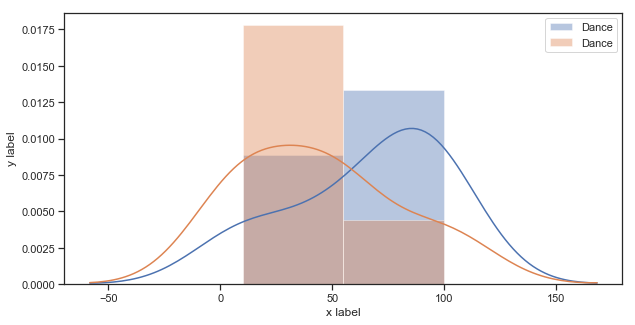

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.distplot(df['Coolness'], label="Dance")
sns.distplot(df['Danceskills'], label="Dance")
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.legend()
plt.show()

### Scatterplot

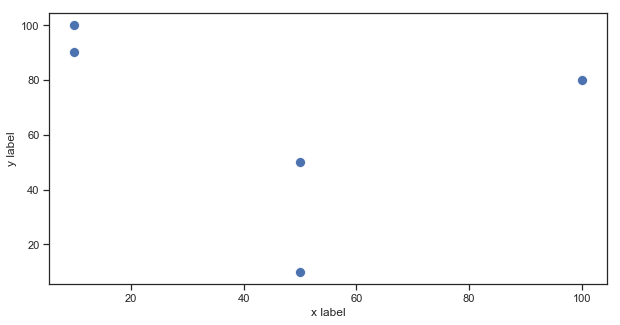

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(data=df, x='Danceskills', y='Coolness', ax=ax, s=100)
ax.set_ylabel("y label")
ax.set_xlabel("x label")
plt.show()

### Boxplot

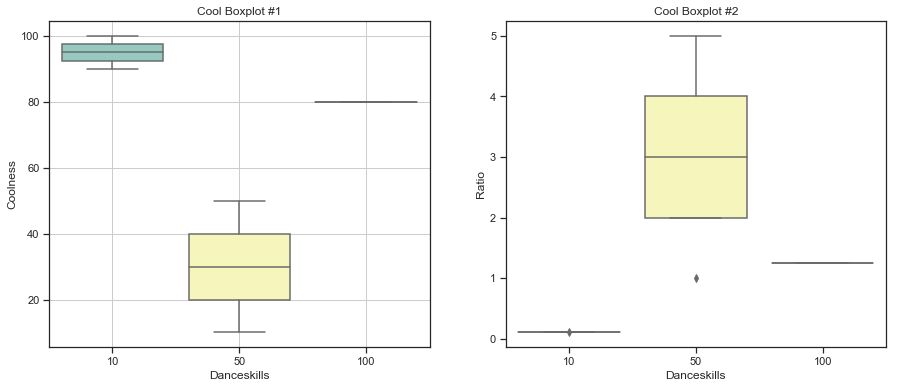

In [188]:
sns.set(style="ticks")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plt.sca(axes[0])
sns.boxplot(x='Danceskills', y='Coolness', data=df, whis="range", palette="Set3")
axes[0].axes.grid(True)
plt.title("Cool Boxplot #1")

plt.sca(axes[1])
sns.boxplot(x='Danceskills', y='Ratio', data=df, whis=[100, 100], palette="Set3")
plt.title("Cool Boxplot #2")

plt.show()

## Bar chart with error bars

C:\Users\jurgi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


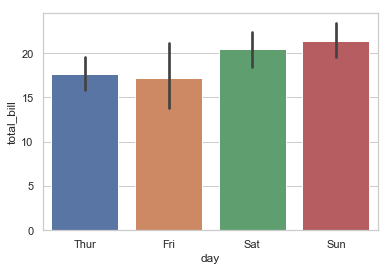

In [8]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)


In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
